June 26th 2024  
Make recurrent connectivity matrices for Delta7s. Note that the matrices have presynaptic neurons on rows and postsynaptic on columns.

In [1]:
import sys, os, glob
import datetime, time

import numpy as np
from numpy import linalg as nla
#import scipy.linalg as sla
import numpy.random as nrd

# import scipy.stats as sst

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import scipy.io as sio
from scipy.stats import wilcoxon
from scipy.stats import binom

from collections import defaultdict

gen_fns_dir = os.path.abspath('../shared')
sys.path.append(gen_fns_dir)
from general_file_fns import load_pickle_file, save_pickle_file

curr_date=datetime.datetime.now().strftime('%Y_%m_%d')+'_'
#sd=int((time.time()%1)*(2**31))
# rng = nrd.default_rng(sd)
# print('Seed= ',sd)

In [2]:
data_path = '../../results/2024_06_19/delta7_conn_with_normalized_weights/'
fname = 'delta7_delta7_connection_with_normalized_weights.csv'
conn_data = pd.read_csv(data_path + fname)


In [3]:
conn_data

,Unnamed: 0,bodyId_pre,bodyId_post,roi,weight,type_pre,instance_pre,type_post,instance_post,norm_weight
0,0,5813061383,5813048042,PB,16,Delta7,Delta7(PB15)_L1L9R8_R,Delta7,Delta7(PB15)_L5R4_L,0.027073
1,1,881221166,941814787,PB,16,Delta7,Delta7(PB15)_L1L9R8_R,Delta7,Delta7(PB15)_L6R3_L,0.027073
2,2,881221166,942522378,PB,7,Delta7,Delta7(PB15)_L1L9R8_R,Delta7,Delta7(PB15)_L2R7_R,0.013308
3,3,881221166,973959177,PB,15,Delta7,Delta7(PB15)_L1L9R8_R,Delta7,Delta7(PB15)_L6R3_L,0.026834
4,4,881221166,1158747783,PB,11,Delta7,Delta7(PB15)_L1L9R8_R,Delta7,Delta7(PB15)_L7R2_L,0.019366
...,...,...,...,...,...,...,...,...,...,...
1823,1823,910783883,941482720,PB,18,Delta7,Delta7(PB15)_L8R1R9_L,Delta7,Delta7(PB15)_L6R3_L,0.030875
1824,1824,910783883,941810314,PB,5,Delta7,Delta7(PB15)_L8R1R9_L,Delta7,Delta7(PB15)_L7R3_L,0.009091
1825,1825,910783883,941814787,PB,12,Delta7,Delta7(PB15)_L8R1R9_L,Delta7,Delta7(PB15)_L6R3_L,0.020305
1826,1826,910783883,973959177,PB,5,Delta7,Delta7(PB15)_L8R1R9_L,Delta7,Delta7(PB15)_L6R3_L,0.008945


In [4]:
# Get list of subtypes
subtype_list = sorted(conn_data['instance_pre'].unique())
print('Pre subtypes same as post subtypes ', sorted(conn_data['instance_post'].unique())==subtype_list)
print(subtype_list)
nsubtypes = len(subtype_list)

# Make a list of all the neurons labeled by subtype and id
pre_neuron_list = conn_data[['instance_pre', 'bodyId_pre']].apply(tuple, axis=1).unique()
post_neuron_list = conn_data[['instance_post', 'bodyId_post']].apply(tuple, axis=1).unique()
neuron_list = sorted(pre_neuron_list)
print('Same neurons in pre and postsynaptic list ', neuron_list == sorted(post_neuron_list))
print('Neuron name subtypes are same as subtype list ', np.all(pd.unique([x for x, _ in neuron_list])==subtype_list))

# Get neuron indices corresponding to each subtype
subtype_idx = defaultdict(list)
for i, nrn in enumerate(neuron_list):
    subtype_idx[nrn[0]].append(i)

# And boundaries, to help in plotting
subtype_boundaries = []
for x, y in zip(subtype_list[:-1], subtype_list[1:]):
    subtype_boundaries.append((subtype_idx[x][-1] + subtype_idx[y][0])/2.)

Pre subtypes same as post subtypes  True
['Delta7(PB15)_L1L9R8_R', 'Delta7(PB15)_L2R7_R', 'Delta7(PB15)_L3R6_R', 'Delta7(PB15)_L4R5_R', 'Delta7(PB15)_L4R6_R', 'Delta7(PB15)_L5R4_L', 'Delta7(PB15)_L6R3_L', 'Delta7(PB15)_L6R4_L', 'Delta7(PB15)_L7R2_L', 'Delta7(PB15)_L7R3_L', 'Delta7(PB15)_L8R1R9_L']
Same neurons in pre and postsynaptic list  True
Neuron name subtypes are same as subtype list  True


In [5]:
tmp = conn_data[(conn_data['bodyId_pre']==5813061383) & (conn_data['bodyId_post']==5813048042)]

In [6]:
tmp['norm_weight']

0    0.027073
Name: norm_weight, dtype: float64

In [7]:
conn_data

,Unnamed: 0,bodyId_pre,bodyId_post,roi,weight,type_pre,instance_pre,type_post,instance_post,norm_weight
0,0,5813061383,5813048042,PB,16,Delta7,Delta7(PB15)_L1L9R8_R,Delta7,Delta7(PB15)_L5R4_L,0.027073
1,1,881221166,941814787,PB,16,Delta7,Delta7(PB15)_L1L9R8_R,Delta7,Delta7(PB15)_L6R3_L,0.027073
2,2,881221166,942522378,PB,7,Delta7,Delta7(PB15)_L1L9R8_R,Delta7,Delta7(PB15)_L2R7_R,0.013308
3,3,881221166,973959177,PB,15,Delta7,Delta7(PB15)_L1L9R8_R,Delta7,Delta7(PB15)_L6R3_L,0.026834
4,4,881221166,1158747783,PB,11,Delta7,Delta7(PB15)_L1L9R8_R,Delta7,Delta7(PB15)_L7R2_L,0.019366
...,...,...,...,...,...,...,...,...,...,...
1823,1823,910783883,941482720,PB,18,Delta7,Delta7(PB15)_L8R1R9_L,Delta7,Delta7(PB15)_L6R3_L,0.030875
1824,1824,910783883,941810314,PB,5,Delta7,Delta7(PB15)_L8R1R9_L,Delta7,Delta7(PB15)_L7R3_L,0.009091
1825,1825,910783883,941814787,PB,12,Delta7,Delta7(PB15)_L8R1R9_L,Delta7,Delta7(PB15)_L6R3_L,0.020305
1826,1826,910783883,973959177,PB,5,Delta7,Delta7(PB15)_L8R1R9_L,Delta7,Delta7(PB15)_L6R3_L,0.008945


In [8]:
# Make the recurrent connectivity matrix ordered according to this neuron list
raw_conn_matrix = np.zeros((len(neuron_list), len(neuron_list)))
norm_conn_matrix = np.zeros_like(raw_conn_matrix)

for i, pre in enumerate(neuron_list):
    for j, post in enumerate(neuron_list):
#        tmp = conn_data[(conn_data['bodyId_pre']==pre[1]) & (conn_data['bodyId_post']==post[1])]['weight']
        tmp = conn_data[(conn_data['bodyId_pre']==pre[1]) & (conn_data['bodyId_post']==post[1])]
        if len(tmp):
            # Earlier version stores a list of duplicate connections to check with Tianhao later.
            raw_conn_matrix[i,j] = tmp['weight'].sum()
            norm_conn_matrix[i,j] = tmp['norm_weight'].sum()


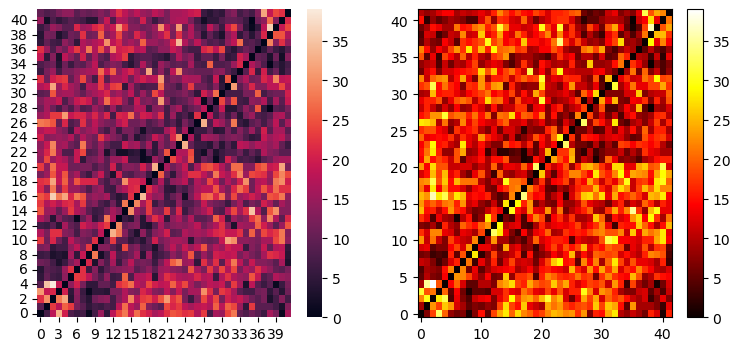

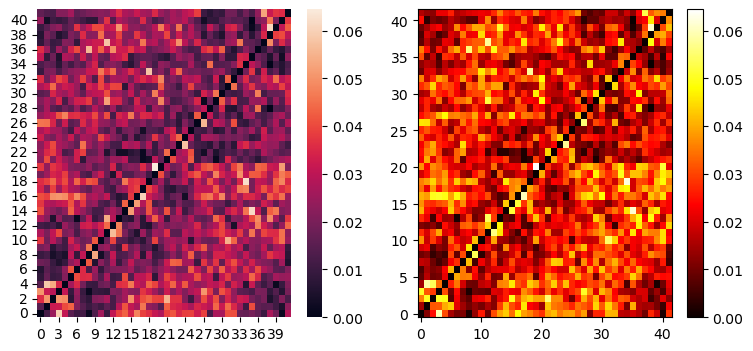

In [11]:
# Plot
fig, ax = plt.subplots(1,2,figsize=(9,4))
sns.heatmap(raw_conn_matrix, cmap="rocket", ax=ax[0])
ax[0].invert_yaxis()
p = ax[1].imshow(raw_conn_matrix, aspect='auto', interpolation='nearest', origin='lower', cmap='hot')
fig.colorbar(p, ax=ax[1])

fig, ax = plt.subplots(1,2,figsize=(9,4))
sns.heatmap(norm_conn_matrix, cmap="rocket", ax=ax[0])
ax[0].invert_yaxis()
p = ax[1].imshow(norm_conn_matrix, aspect='auto', interpolation='nearest', origin='lower', cmap='hot')
fig.colorbar(p, ax=ax[1])

In [10]:
to_save = {'subtype_list' : subtype_list, 'neuron_list' : neuron_list, 'subtype_idx' : subtype_idx,
           'subtype_boundaries' : subtype_boundaries, 'raw_conn_matrix' : raw_conn_matrix, 
           'norm_conn_matrix' : norm_conn_matrix}
data_path = '../../results/2024_06_26/delta7_rec_matrices/'
fname = 'delta7_delta7_connections_rec_matrices_with_normalized_weights.p'
save_file = data_path + fname
save_pickle_file(to_save, save_file)
# conn_data.to_csv(out_file) 

In [12]:
np.sum(norm_conn_matrix, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [13]:
np.sum(norm_conn_matrix, axis=1)

array([1.11066536, 1.07428478, 1.15333692, 0.93614493, 1.10797932,
       1.03968698, 0.97817344, 0.93937273, 0.87275655, 0.93818312,
       1.0159335 , 1.14146329, 0.98734235, 0.96098453, 1.12852016,
       0.97076651, 1.30667406, 1.14659892, 1.26934259, 1.16443867,
       1.20383384, 0.8465407 , 0.74282185, 0.9163152 , 0.94272059,
       0.79516796, 0.95232443, 1.06784268, 0.78066163, 1.02200436,
       0.98300249, 1.06786716, 1.14077369, 0.97673342, 0.72695887,
       0.75737788, 1.0433531 , 1.06449647, 0.93656429, 1.09261823,
       0.73847814, 0.95889427])